In [1]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0, 63),
 (3, 'USC00519397', '2010-01-03', 0, 74),
 (4, 'USC00519397', '2010-01-04', 0, 76),
 (5, 'USC00519397', '2010-01-06', None, 73)]

In [6]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp INTEGER
tobs INTEGER


In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurements = Base.classes.measurements

In [10]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
stations = Base.classes.stations

In [11]:
session = Session(engine)

In [26]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
### BEGIN SOLUTION
sel = [measurements.date, 
       measurements.prcp]
may_averages = session.query(*sel).\
    filter(func.strftime("%m", measurements.date) == "10").\
    group_by(measurements.prcp).\
    order_by(measurements.date).all()
### END SOLUTION
may_averages

[('2010-10-01', 0.19),
 ('2010-10-01', 0.77),
 ('2010-10-01', 3.14),
 ('2010-10-02', 1.15),
 ('2010-10-02', 1.27),
 ('2010-10-19', 4.01),
 ('2010-10-21', 0.39),
 ('2010-10-21', 1.91),
 ('2010-10-22', 0.21),
 ('2010-10-22', 1.16),
 ('2010-10-26', 1.1),
 ('2010-10-27', 1.06),
 ('2010-10-30', 1.9),
 ('2011-10-06', 0.65),
 ('2011-10-14', 0.57),
 ('2011-10-15', 1.72),
 ('2011-10-17', 0.43),
 ('2011-10-18', 0.44),
 ('2011-10-22', 0.34),
 ('2011-10-23', 1.48),
 ('2011-10-23', 1.56),
 ('2011-10-24', 2.4),
 ('2011-10-24', 4.47),
 ('2011-10-25', 1.6),
 ('2012-10-23', 0.08),
 ('2012-10-25', 0.82),
 ('2012-10-28', 0.49),
 ('2012-10-29', 0.53),
 ('2012-10-31', 0.2),
 ('2013-10-01', 0.55),
 ('2013-10-01', 0.67),
 ('2013-10-05', 0.72),
 ('2013-10-11', 0.45),
 ('2013-10-11', 1.95),
 ('2013-10-14', 2.15),
 ('2013-10-15', 0.62),
 ('2013-10-21', 0.05),
 ('2013-10-28', 0.18),
 ('2013-10-30', 0.12),
 ('2013-10-31', 0.54),
 ('2014-10-01', 0.87),
 ('2014-10-01', 1.19),
 ('2014-10-01', 1.71),
 ('2014-10-02', 

<IPython.core.display.Javascript object>


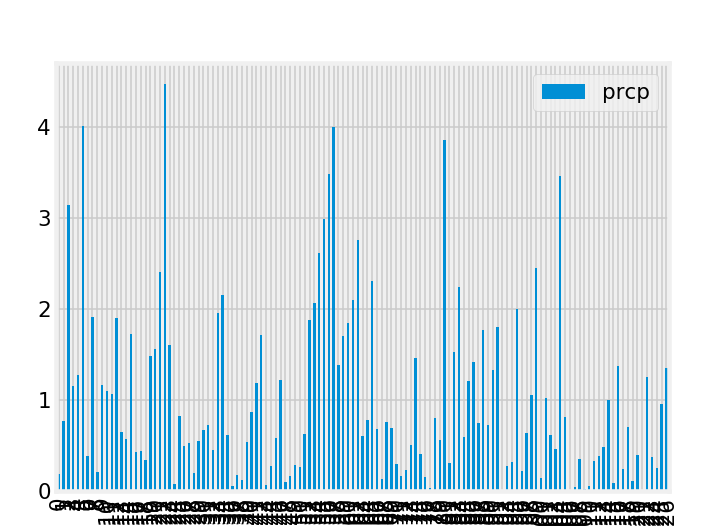

In [27]:
# Plot the Results
### BEGIN SOLUTION
df = pd.DataFrame(may_averages, columns=['date', 'prcp'])
df.set_index('date')#, inplace=True)
df.plot.bar()
#plt.tight_layout()
plt.show()
### END SOLUTION

In [28]:

df

,date,prcp
0,2010-10-01,0.19
1,2010-10-01,0.77
2,2010-10-01,3.14
3,2010-10-02,1.15
4,2010-10-02,1.27
5,2010-10-19,4.01
6,2010-10-21,0.39
7,2010-10-21,1.91
8,2010-10-22,0.21
9,2010-10-22,1.16


In [4]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))